In [33]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd

import sys
sys.path.insert(0, '../SOM-LVQ')
import SOM_LVQ
from minisom import MiniSom
from supervisedSom import supervisedSom

In [34]:
data = pd.read_csv(r"../data/rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [35]:
# Training the SOM
from minisom import MiniSom
som1 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train)
som1.train_random(data = x_train, num_iteration = 100)

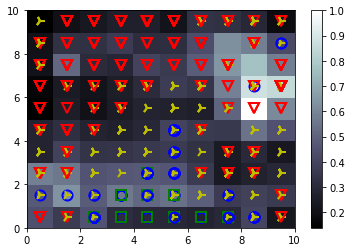

In [36]:
suso1 = supervisedSom(som1, x_train, y_train)

label1= suso1.visualSom()

In [37]:
taggings1 = suso1.taggingSom()

p_vectors = SOM_LVQ.init_LVQ_pvectors(som1, taggings1, x_train, y_train)

In [38]:
lvq1 = SOM_LVQ.SOM_LVQ(x_train, y_train, n_classes=4, n_neurons=35, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq1.fit(x_train, y_train)

In [39]:
neurons.shape

(10, 10)

In [40]:
predicted_y1 = [lvq1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.95      0.90      0.93       227
          1       0.88      0.95      0.91        74
          2       0.62      0.13      0.21        39
          3       0.74      0.92      0.82       153

avg / total       0.85      0.85      0.84       493



In [41]:
propa1 = suso1.propabilitySom()

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Thend\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


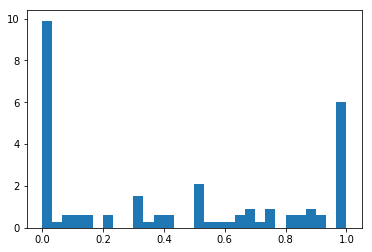

In [43]:
plt.hist(propa1[3].reshape(100, 1), normed=True, bins=30);

In [44]:
# data_new = pd.read_csv(r"../data/SD-2X_rocktype.csv")
# x_new = data_new.iloc[:, 0:6].values
# y_new = data_new.iloc[:, 6].values
# y_new[y_new == 4] = 0
# x_new = minmax.fit_transform(x_new)
# predicted_y_new = [lvq1.predict(instance) for instance in x_new]

# from sklearn.metrics import classification_report

# print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

In [53]:
type(lvq1.win_map_LVQ(x_train))

collections.defaultdict

In [57]:
tmp = 0
for k, v in lvq1.win_map_LVQ(x_train).items():
    if len(v) > 0:
        tmp += 1
tmp

45